<strong>Date :</strong> Created on 15 March 2021| Updated on 20 March 2021 </strong>

<strong>Group 2 - Hydrogen vehicles 
    
@author : </strong>All the group

<strong>scraping_V1.4
      
Description :</strong> The purpose of this notebook is to create graphics to enhance the data. 

# Install / Download / Import Librairies

## Install

In [118]:
!pip install wordcloud

     |████████████████████████████████| 366 kB 998 kB/s eta 0:00:01


In [7]:
!pip install cartopy

     |████████████████████████████████| 14.4 MB 2.8 MB/s eta 0:00:01    |█████                           | 2.2 MB 1.3 MB/s eta 0:00:10     |███████▏                        | 3.2 MB 1.9 MB/s eta 0:00:06     |███████████▊                    | 5.3 MB 1.9 MB/s eta 0:00:05     |██████████████████              | 8.1 MB 2.7 MB/s eta 0:00:03     |██████████████████▋             | 8.4 MB 2.7 MB/s eta 0:00:03     |███████████████████████▎        | 10.5 MB 2.7 MB/s eta 0:00:02     |█████████████████████████       | 11.2 MB 2.7 MB/s eta 0:00:02     |█████████████████████████▏      | 11.4 MB 2.7 MB/s eta 0:00:02     |████████████████████████████████| 14.4 MB 2.8 MB/s 
     |████████████████████████████████| 1.0 MB 1.2 MB/s eta 0:00:01
  Created wheel for cartopy: filename=Cartopy-0.18.0-cp37-cp37m-linux_x86_64.whl size=15535432 sha256=68521403a8682b1dfca949b6ac19c14afe757d42b2ef1fbaf27eeba8cf5446eb
  Stored in directory: /home/theo/.cache/pip/wheels/0b/a9/54/172056df34478378e0636d30cd4d1a868de00e37

## Import 

In [1]:
# Useful librairies
from tqdm import tqdm
import pandas as pd
import numpy as np
import random

# Module for access to Oracle database
import cx_Oracle

# Libraries for graphics 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

# Libraries for maps
from cartopy import crs
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.colors as mat_colors
import  matplotlib.cm as cm

# Libraries for timelines
import plotly.offline as py
import plotly.figure_factory as ff

In [2]:
# Connection to the database 'SCT2985A'.
mydb = cx_Oracle.connect('SCT2985A/esg@//telline.univ-tlse3.fr:1521/etupre',
                         encoding='UTF-8',
                         nencoding="UTF-8")

# Creation of the cursor. It is used to execute statements to communicate with the Oracle database.
mycursor = mydb.cursor()

## Part 1 - Informations about articles

In [50]:
def autolabel(rects, axes, ajustementY: int, isPourcentage: bool):
    """ 
    Documentation:
        - Display value labels above each bar in histograms

    Parameters: 
        * rects (BarContainer): object containing the rectangles whose values you want to display 
        above
        * axes (matplotlib.axes): object allowing to know the subgraph of the figure where the bar chart will be displayed. 
        the bar chart will be displayed.
        * adjustmentY (int): depending on the graph, the position of the label above each bar
        (int): depending on the graph, the position of the label above each bar will not be exactly the same, so an adjustment of this position will be made by giving 
        parameters an integer.  
        * isPercentage (boolean): Allows you to know if you should display the values in percent or not 

    Outputs : 
        * rects (BarContainer): object containing the modified rectangles
        * axes (matplotlib.axes): object allowing to know the subgraph of the figure where the bar chart will be 
        display the bar chart.
    """

    # For each bar in the bar chart
    for rect in rects:
        # The height is retrieved
        height = rect.get_height()

        if (isPourcentage):
            # Display the label, round the value to one decimal point and then make
            # some adjustments to the position and text.
            axes.annotate(str(height) + "%", xy=(rect.get_x() + rect.get_width() / 2, height),
                          xytext=(0, ajustementY), textcoords="offset points", ha='center', va='bottom')

        else:
            # A label is only displayed if the value is not zero
            if (height != 0):
                # Display the label, round the value to one decimal point and then make
                # some adjustments to the position and text.
                axes.annotate(str(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                              xytext=(0, ajustementY), textcoords="offset points", ha='center', va='bottom')

    return rects, axes

In [51]:
def select_partie1(req: str):
    """
    Documentation:
        - Function that allows the database to be queried via an SQL query passed in parameter. 

    Parameters: 
        - req : SQL request

    Outputs : 
        - name_item (str) : name of the attribute
        - nb_articles (int) : number of articles per attribute
    """
    # Execution of the request
    res = mycursor.execute(req)

    # Results as a list
    res = [row for row in res]

    # Column separations
    name_item = [row[0] for row in res]
    nb_articles = [row[1] for row in res]

    return (name_item, nb_articles)

Execution of each of the SQL queries for part 1. 

In [52]:
# Les véhicules les plus évoqués 
req_sql = " SELECT V.type_vehicule, COUNT(VE.id_vehicule) \
            FROM Vehicule V, Vehicule_Evoq VE \
            WHERE V.id_vehicule = VE.id_vehicule \
            GROUP BY V.type_vehicule \
            ORDER BY COUNT(VE.id_vehicule) DESC"

(vehicule, nb_vehicule) = select_partie1(req_sql)

In [53]:
# Les domaines les plus évoqués 
req_sql = " SELECT D.nom_domaine, COUNT(DE.id_domaine) \
            FROM Domaine D, Domaine_Evoq DE \
            WHERE D.id_domaine = DE.id_domaine \
            GROUP BY D.nom_domaine \
            ORDER BY COUNT(DE.id_domaine) DESC"

(domaine, nb_domaine) = select_partie1(req_sql)

In [54]:
# Les technologies de production les plus évoquées (à comparer avec le monde de l'industrie)
req_sql = " SELECT T.nom_tech, COUNT(TE.id_tech) \
            FROM Technologie T, Technologie_Evoq TE \
            WHERE T. id_tech = TE.id_tech AND T.categorie = 'Production' \
            GROUP BY T.nom_tech \
            ORDER BY COUNT(T.id_tech) DESC"

(prod, nb_prod) = select_partie1(req_sql)

In [55]:
# Les sources de production les plus évoquées
req_sql = " SELECT T.source, COUNT(TE.id_tech) \
            FROM Technologie T, Technologie_Evoq TE \
            WHERE T. id_tech = TE.id_tech AND T.categorie = 'Production' \
            GROUP BY T.source \
            ORDER BY COUNT(T.id_tech) DESC"

(source, nb_source) = select_partie1(req_sql)

In [56]:
# Les types de stockage les plus évoqués
req_sql = " SELECT T.nom_tech, COUNT(TE.id_tech) \
            FROM Technologie T, Technologie_Evoq TE \
            WHERE T. id_tech = TE.id_tech AND T.categorie = 'Stockage' \
            GROUP BY T.nom_tech \
            ORDER BY COUNT(T.id_tech) DESC"

(stockage, nb_stockage) = select_partie1(req_sql)

In [57]:
# Les types de moteur les plus évoqués
req_sql = " SELECT M.type_moteur, COUNT(ME.id_moteur) \
            FROM Moteur M, Moteur_Evoq  ME \
            WHERE M.id_moteur = ME.id_moteur  \
            GROUP BY M.type_moteur \
            ORDER BY COUNT(M.id_moteur) DESC"

(moteur, nb_moteur) = select_partie1(req_sql)

In [58]:
# Les marques les plus évoquées
req_sql = " SELECT M.nom_marque, COUNT(ME.id_marque) \
            FROM Marque M, Marque_Evoq ME \
            WHERE M.id_marque = ME.id_marque \
            GROUP BY M.nom_marque \
            ORDER BY COUNT(ME.id_marque) DESC"

(marque_tempo, nb_marque_tempo) = select_partie1(req_sql)

In [59]:
# We will not be able to display all the brands.
# So we only display the first 20 and the rest go into the 'Other' category.
marque = []
nb_marque = []
somme_autre = 0
cpt = 0

for m, nb in zip(marque_tempo, nb_marque_tempo):
    if (cpt <= 20):
        marque.append(m)
        nb_marque.append(nb)
    else:
        somme_autre += nb
    cpt += 1

marque.append('Autre')
nb_marque.append(somme_autre)

In [60]:
# Dictionary to adjust the axis legend.
dic_domaine = {
    'Aéronautique': 'Aéro',
    'Astronautique': 'Astro',
    "Transport Marchandises": "Transport\nMarchandises",
    "Transport Personnes": "Transport \nPersonnes",
    "Energies Renouvelables": "Energies \nRenouvelables",
    "Energies Fossiles": "Energies\nFossiles",
}

dic_prod = {
    "Fission photocatalytique": "Fission \nphotocatalytique",
    "Culture d'algues": "Culture \nd'algues",
    "Pyrolyse du méthane": "Pyrolyse \ndu méthane",
    "Oxydation partielle": "Oxydation \npartielle",
    "Gazéification du charbon": "Gazéification \ndu charbon",
    "Reformage plasma": "Reformage \nplasma",
}

dic_moteur = {
    'Pile à combustible': 'Pile à \ncombustible',
    'Combustion interne': 'Combustion \ninterne',
}

dic_marque = {
    'Roland Gumpert': 'Roland\nGumpert',
    'General Motors': 'General\nMotors',
    'ArianeGroup': 'Ariane\nGroup',
}

In [61]:
# Grouping of information in a list 
liste_nb = [nb_vehicule, nb_domaine, nb_prod,
            nb_source, nb_stockage, nb_moteur, nb_marque]

liste_titre = ["par type de véhicules.", 'par domaine.', 'par type de production.',
               'par source de production.', 'par type de stockage.', 'par type de moteurs.', "par marque."]

liste_sauv = ["véhicule", 'domaine', 'production',
              'source', 'stockage', 'moteur', 'marque']


    
#atts = atts.apply(lambda x : 'Hydrocarbures' if x=="Hydraucarvures" else x)
source = ["Hydrocarbures" if elem == "Hydraucarbures" else elem for elem in source] 
    
    
    
    

liste_legende = [vehicule, domaine, prod, source, stockage, moteur, marque]

liste_labels = [vehicule, dic_domaine, dic_prod,
                source, stockage, moteur, dic_marque]

In [62]:
def histo_diag_circu(liste_nb, liste_titre, liste_labels, liste_legende, liste_sauv, isPartie1):

    # For each value, title, labels, legend, save
    for nb, titre, labels, legende, sauv in zip(liste_nb, liste_titre, liste_labels, liste_legende, liste_sauv):

        # Creation figure
        figure, axes = plt.subplots()

        # If the labels are in a dictionary, the new values must be retrieved
        if (type(labels) == dict):
            labels = [labels[elem]
                      if elem in labels else elem for elem in legende]

        # The proportion of each value (label) in the 'porpor' list is retrieved
        propor = np.array(nb) / np.sum(np.array(nb))
        propor = [round(item * 100, 1) for item in propor]

        # If there are more than 4 modalities, a histogram is made
        if (len(labels) > 4):
            # For marks, the size of the figure must be adjusted
            if (sauv == 'marque'):
                figure.set_size_inches(20, 12)
            else:
                figure.set_size_inches(16, 10)

            # Title
            axes.set_title("Proportion de citations " +
                           titre, fontsize=13, color='blue')

            # Histogram creation
            rect = axes.bar(labels, propor, color='darkgray',
                            label='Proportion (%)', edgecolor='black')

            # Adding labels above each bar
            (rect, axes) = autolabel(rect, axes, 2, True)

            # Legende
            axes.legend()

        # If less than 4 modalities we make a pie chart
        else:
            # Size
            figure.set_size_inches(10, 10)

            # Title
            axes.set_title("Proportion de citations " + titre + "\n\n",
                           fontsize=15, color='blue')

            # Pie chart
            wedges, texts, autotexts = axes.pie(
                propor, labels=labels, radius=1.2,
                autopct=lambda x: str(round(x, 1)) + '%' if x > 1 else '',
                pctdistance=0.7, labeldistance=1.1, shadow=True,
                colors=['tan', 'indianred', 'mediumslateblue', 'palevioletred',
                        'coral', 'darkseagreen', 'rosybrown', 'darkgray'])

            # Increase in text size
            for text in texts:
                text.set_fontsize('large')

            # Displaying the proportions in the circle
            for autotexts in autotexts:
                autotexts.set_weight('bold')
                autotexts.set_bbox(dict(facecolor='white', alpha=0.5))

            # Legende
            if (sauv == "moteur"):
                axes.legend(wedges, legende, bbox_to_anchor=(0.6, 0, 0.5, 1))
            else:
                axes.legend(wedges, legende)

        # Save
        if (isPartie1):
            plt.savefig("partie1_" + sauv + ".jpeg")
        else:
            plt.savefig("partie4_" + sauv + ".jpeg")

        # Display
        plt.show()

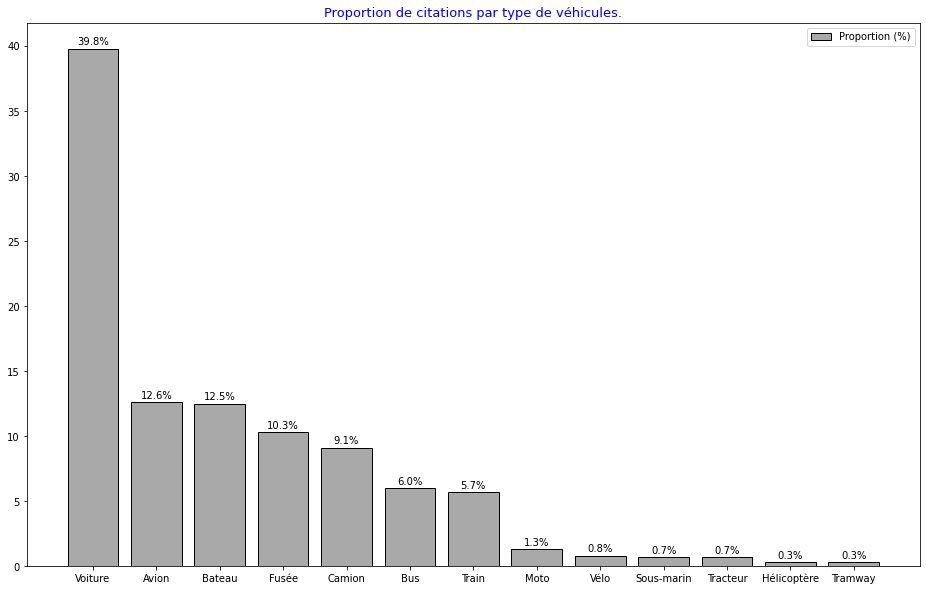

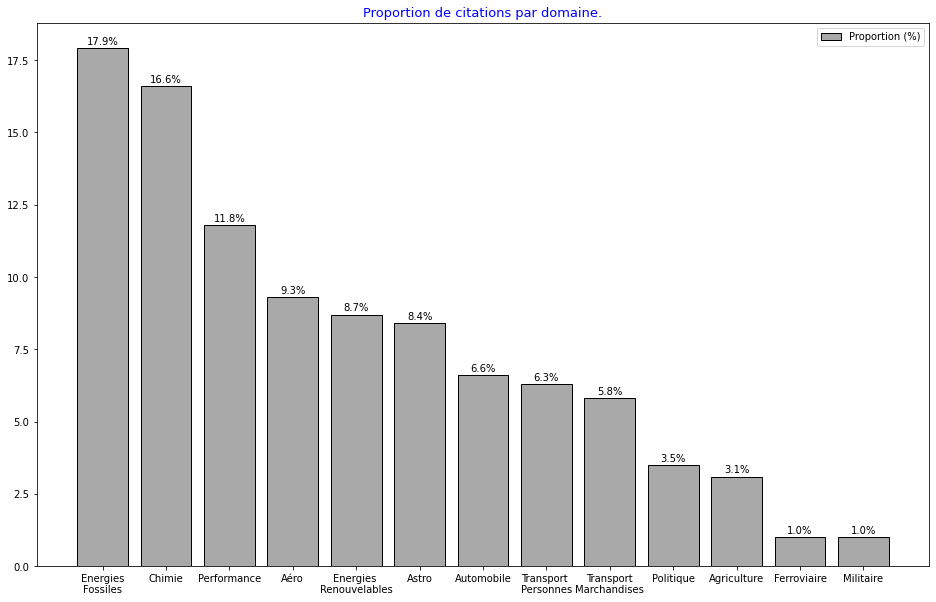

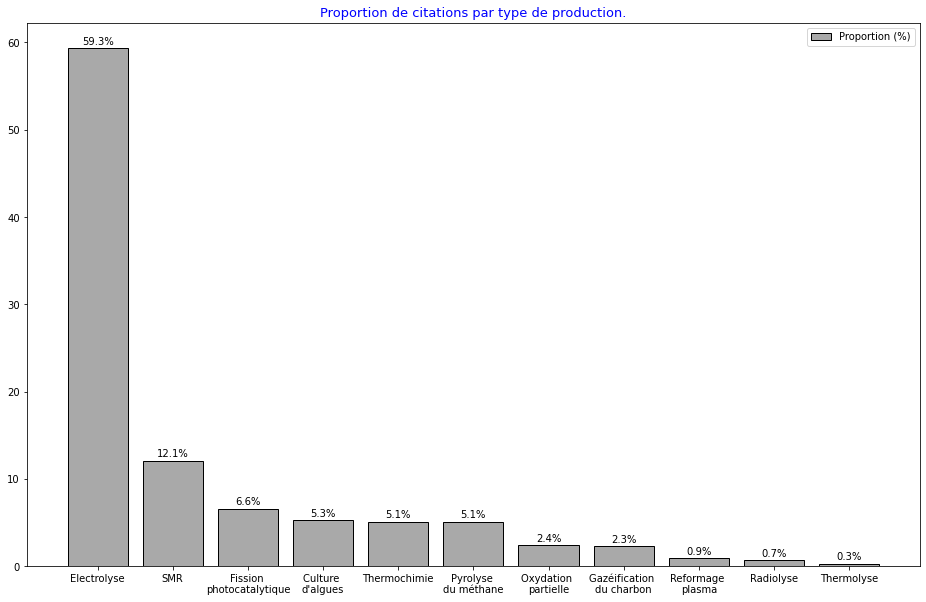

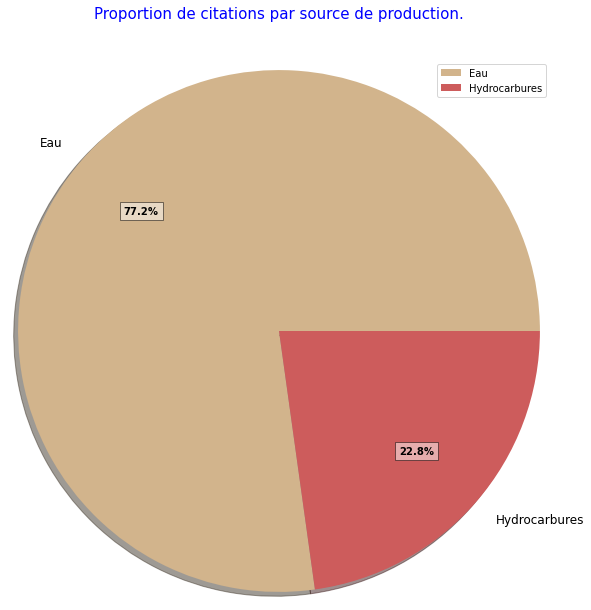

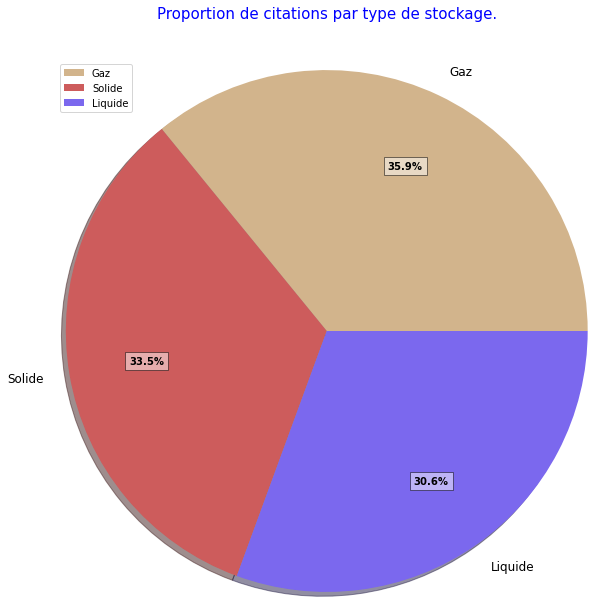

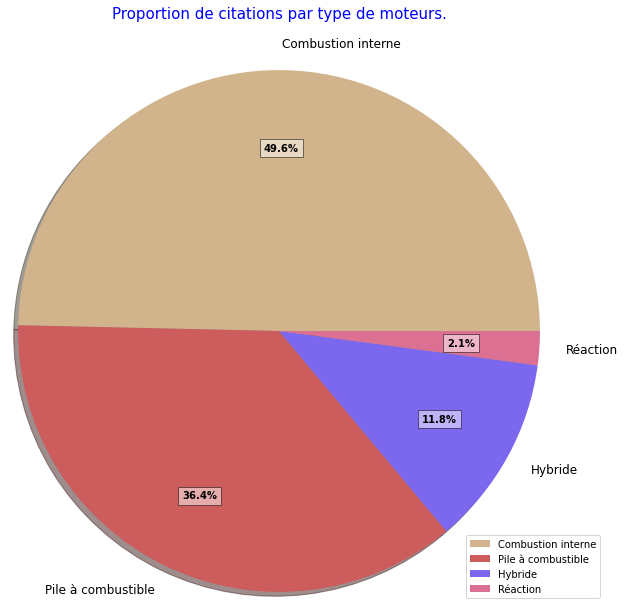

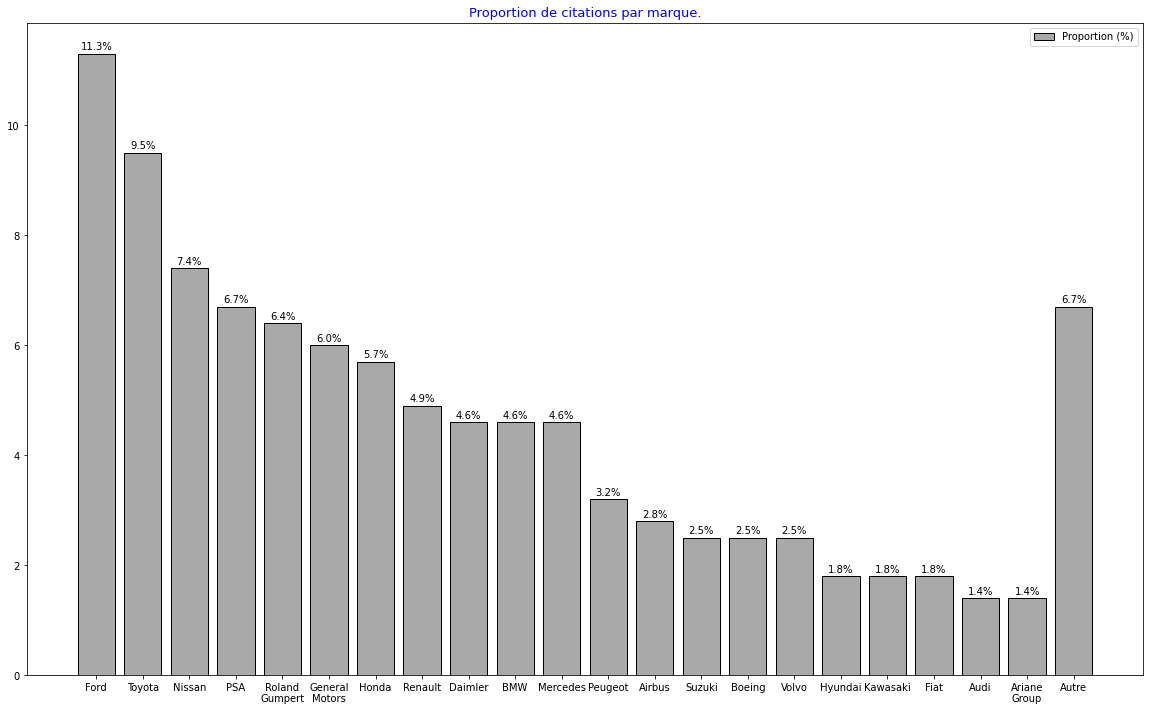

In [63]:
histo_diag_circu(liste_nb, liste_titre, liste_labels, liste_legende, liste_sauv, True)

## Part 1-2) Word cloud

In [17]:
req_sql = " SELECT M.mot, COUNT(ME.id_motcle) \
            FROM MotCle M, MotCle_Evoq ME \
            WHERE M.id_motcle = ME.id_motcle \
            GROUP BY M.mot \
            ORDER BY COUNT(ME.id_motcle) DESC"

(mot, nb_mot) = select_partie1(req_sql)

In [18]:
# Generation of a text from the keywords. 
tempo = []
for m, nb in zip(mot, nb_mot) :
    tempo.extend([m] * nb)
    
# This text is mixed 
random.shuffle(tempo)
text = ""
for mot in tempo:
    text += (mot + ' ')

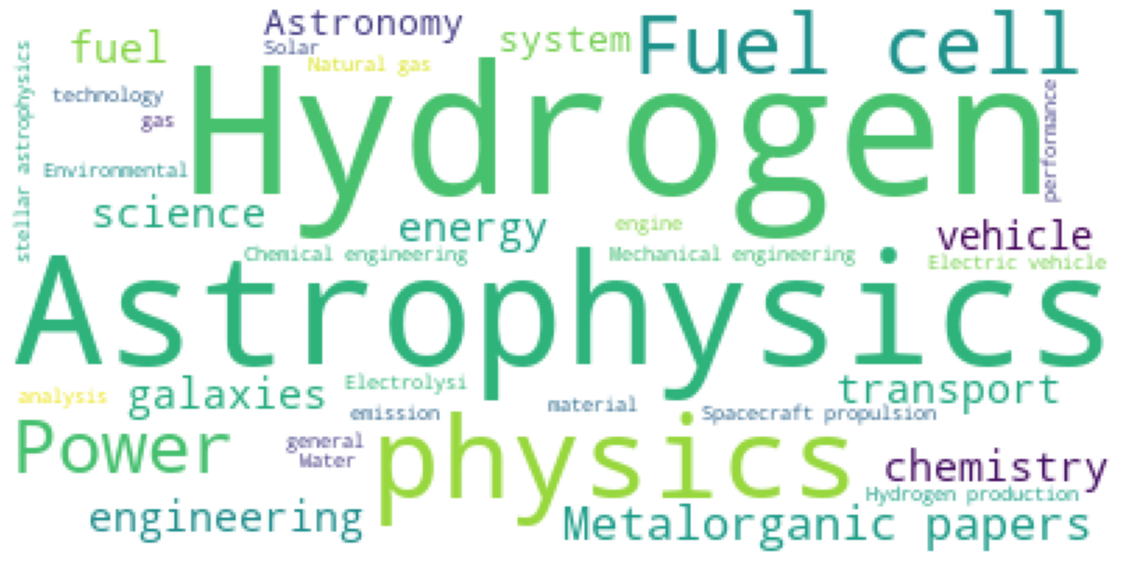

In [19]:
# Word Cloud
plt.figure(figsize=(20,20))

# Word to be deleted 
exclure_word = ['de', 'and', 'the', 'a', 'of']

wordcloud = WordCloud(background_color = 'white', stopwords = exclure_word, max_words = 35).generate(text)
plt.imshow(wordcloud)

# Axis
plt.axis("off")

# save
plt.savefig("partie1_mot.jpeg")

# Display 
plt.show()

## Part 2 - Informations vehicles/technologies

In [24]:
def select_partie2(req : str):
    """
    Documentation:
        - Function that allows the database to be queried via an SQL query passed in parameter. 

    Parameters: 
        - req : SQL request

    Outputs : 
        - vehicule (str) : type of vehicules
        - att (str) : associated attribute 
        - count (int) : number of selection 
    """
    # Execution of the request
    res = mycursor.execute(req)
    
    # Results as a list
    res = [row for row in res]
    
    # Column separations
    vehicule = [row[0] for row in res]
    att = [row[1] for row in res]
    count = [row[2] for row in res]
    
    return (vehicule, att, count)

In [25]:
def labels_stacked_100(list_axes: list):
    """
    Documentation:
        - Function to display the percentages for each category. 

    Parameters: 
        - list_axes : list of axes. 
    """

    # 2 modalities
    if len(list_axes) == 2:

        for r1, r2 in zip(list_axes[0], list_axes[1]):

            # We get the height to know the display area
            h1 = r1.get_height()
            h2 = r2.get_height()

            # Display of values
            if (h1 > 0):
                plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d%%" % h1,
                         ha="center", va="center", color="white", fontsize=16, fontweight="bold")
            if (h2 > 0):
                plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d%%" % h2,
                         ha="center", va="center", color="white", fontsize=16, fontweight="bold")

    # 3 modalities
    if len(list_axes) == 3:

        for r1, r2, r3 in zip(list_axes[0], list_axes[1], list_axes[2]):

            # We get the height to know the display area
            h1 = r1.get_height()
            h2 = r2.get_height()
            h3 = r3.get_height()

            # Display of values
            if (h1 > 0):
                plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d%%" % h1,
                         ha="center", va="center", color="white", fontsize=16, fontweight="bold")
            if (h2 > 0):
                plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d%%" % h2,
                         ha="center", va="center", color="white", fontsize=16, fontweight="bold")
            if (h3 > 0):
                plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., "%d%%" %
                         h3, ha="center", va="center", color="white", fontsize=16, fontweight="bold")

    # 4 modalities
    if len(list_axes) == 4:

        for r1, r2, r3, r4 in zip(list_axes[0], list_axes[1], list_axes[2], list_axes[3]):

            # We get the height to know the display area
            h1 = r1.get_height()
            h2 = r2.get_height()
            h3 = r3.get_height()
            h4 = r4.get_height()

            # Display of values
            if (h1 > 0):
                plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d%%" % h1,
                         ha="center", va="center", color="white", fontsize=16, fontweight="bold")
            if (h2 > 0):
                plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d%%" % h2,
                         ha="center", va="center", color="white", fontsize=16, fontweight="bold")
            if (h3 > 0):
                plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., "%d%%" %
                         h3, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
            if (h4 > 0):
                plt.text(r4.get_x() + r4.get_width() / 2., h1 + h2 + h3 + h4 / 2., "%d%%" %
                         h4, ha="center", va="center", color="white", fontsize=16, fontweight="bold")

In [45]:
def stacked_100(vehicule, att, count, nom_att, ylabel):
    """
    Documentation:
        - Function that allows for 100% stacked diagrams. 

    Parameters: 
        - vehicule : list of vehicle types 
        - att : list of values of the associated attribute 
        - count : number of value 
        - nom_att : name of the associated attribute 
        - ylabel : legende for y-axe
    """

    # Creation of a dictionary that associates vehicle-attribute
    dic = {}
    for vehi in set(vehicule):
        liste = []
        for a in set(att):
            try:
                nb = int(
                    df.loc[df[nom_att] == a].loc[df['Vehicule'] == vehi].values[0][2])
            except:
                nb = 0
            liste.append(nb)
        dic[vehi] = liste

    # Creation of a new DataFrame from the dictionary created just above
    df2 = pd.DataFrame.from_dict(dic, orient='index', columns=set(att))

    # Divide by the sum of the columns and multiply by 100 to get percentages
    df2_100 = df2.div(df2.sum(axis=1), axis=0) * 100

    bottom_list = []

    # Loops through each continent column.
    # Each column will take the sum of all columns before it as its base.
    for i in df2_100.columns:
        b = list(df2_100.loc[:, df2.columns[0]: i].sum(axis=1))
        bottom_list.append(b)

    # Creation figure
    fig, ax = plt.subplots(figsize=(16, 10))

    x_ax = df2_100.index
    list_axes = []

    # For each column
    for enum, c in zip(enumerate(df2_100.columns), colors):
        i = enum[0]
        v = enum[1]

        if i == 0:
            # First column is at the bottom of the chart so bottom is 0 and doesn't need to be specified.
            list_axes.append(
                ax.bar(x_ax, df2_100[v], label=v, color=c, width=0.65))

        else:
            list_axes.append(ax.bar(
                x_ax, df2_100[v], bottom=bottom_list[i - 1], label=v, color=c, width=0.65))

    # Display the percentages for each category.
    labels_stacked_100(list_axes)

    # Titles axes
    plt.xlabel("\nTypes de véhicule", fontsize=13)
    plt.ylabel("Répartition (en %) " + ylabel, fontsize=13)

    # Legende
    plt.legend()

    # Save
    plt.savefig("partie2_" + nom_att + ".jpeg")

In [46]:
# SELECT query for storage types
req_sql = " SELECT V.type_vehicule, T.nom_tech, COUNT(TE.id_article) \
            FROM Technologie T, Technologie_Evoq TE, Vehicule V, Vehicule_Evoq VE \
            WHERE   VE.id_article = TE.id_article AND T. id_tech = TE.id_tech AND V.id_vehicule = VE.id_vehicule \
            AND T.categorie = 'Stockage' \
            AND (SELECT COUNT(*) FROM Vehicule_Evoq VE2 WHERE VE2.id_article = VE.id_article) = 1 \
            AND (SELECT COUNT(*) FROM Technologie_Evoq TE2 WHERE TE2.id_article = TE.id_article) = 1 \
            GROUP BY V.type_vehicule, T.nom_tech \
            ORDER BY V.type_vehicule, T.nom_tech"

(vehicule, stockage, count) = select_partie2(req_sql)

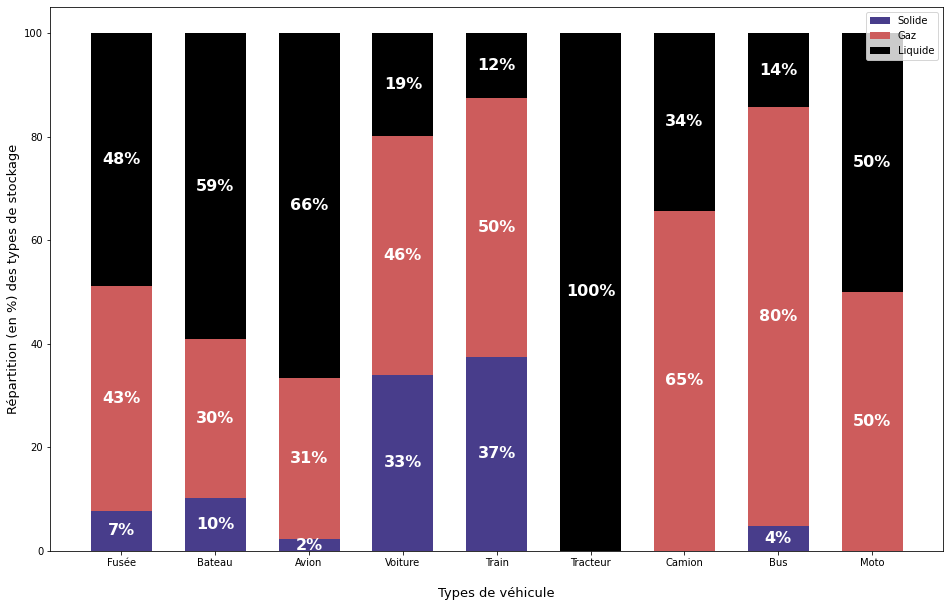

In [47]:
# Apply the function for stacked diagrams to 100% of the storage type results
colors=['darkslateblue', 'indianred', 'black']
stacked_100(vehicule, stockage, count, "Stockage", "des types de stockage")

In [48]:
# SELECT query for production sources 
req_sql = " SELECT V.type_vehicule, T.source, COUNT(TE.id_article) \
            FROM Technologie T, Technologie_Evoq TE, Vehicule V, Vehicule_Evoq VE \
            WHERE   VE.id_article = TE.id_article AND T. id_tech = TE.id_tech AND V.id_vehicule = VE.id_vehicule \
            AND T.categorie = 'Production' \
            AND (SELECT COUNT(*) FROM Vehicule_Evoq VE2 WHERE VE2.id_article = VE.id_article) = 1 \
            AND (SELECT COUNT(*) FROM Technologie_Evoq TE2 WHERE TE2.id_article = TE.id_article) = 1 \
            GROUP BY V.type_vehicule, T.source \
            ORDER BY V.type_vehicule, COUNT(TE.id_article) DESC"

(vehicule, source, count) = select_partie2(req_sql)

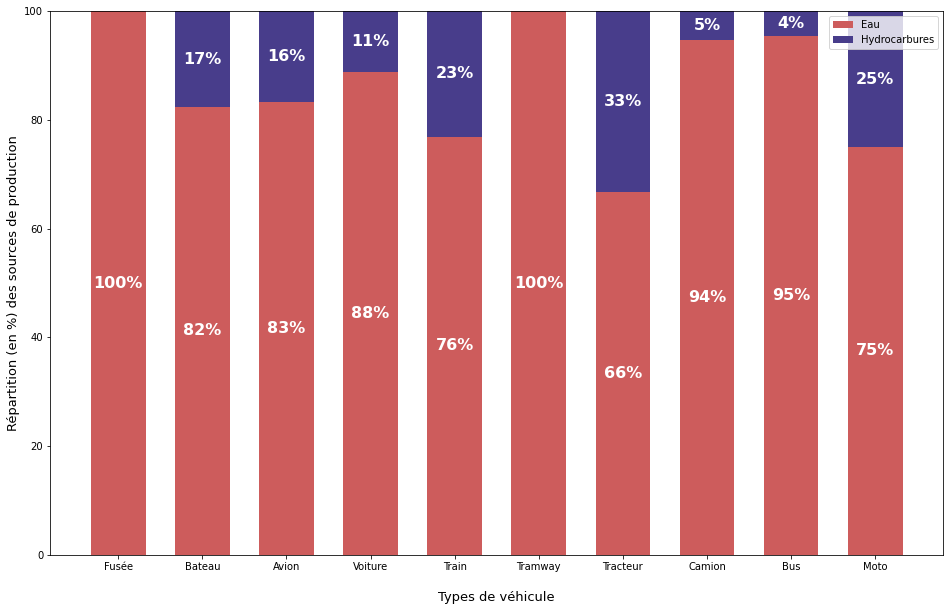

In [49]:
# Apply the function for stacked diagrams to 100% of the source type results
colors=['indianred', 'darkslateblue']
stacked_100(vehicule, source, count, "Source", "des sources de production")

In [27]:
# SELECT query for engine types
req_sql = " SELECT V.type_vehicule, M.type_moteur, COUNT(ME.id_article) \
            FROM Moteur M, Moteur_Evoq ME, Vehicule V, Vehicule_Evoq VE \
            WHERE   VE.id_article = ME.id_article AND M.id_moteur = ME.id_moteur AND \
            V.id_vehicule = VE.id_vehicule \
            AND (SELECT COUNT(*) FROM Vehicule_Evoq VE2 WHERE VE2.id_article = VE.id_article) = 1 \
            AND (SELECT COUNT(*) FROM Moteur_Evoq ME2 WHERE ME2.id_article = ME.id_article) = 1 \
            GROUP BY V.type_vehicule, M.type_moteur \
            ORDER BY V.type_vehicule ASC, COUNT(ME.id_article) DESC"

(vehicule, moteur, count) = select_partie2(req_sql)

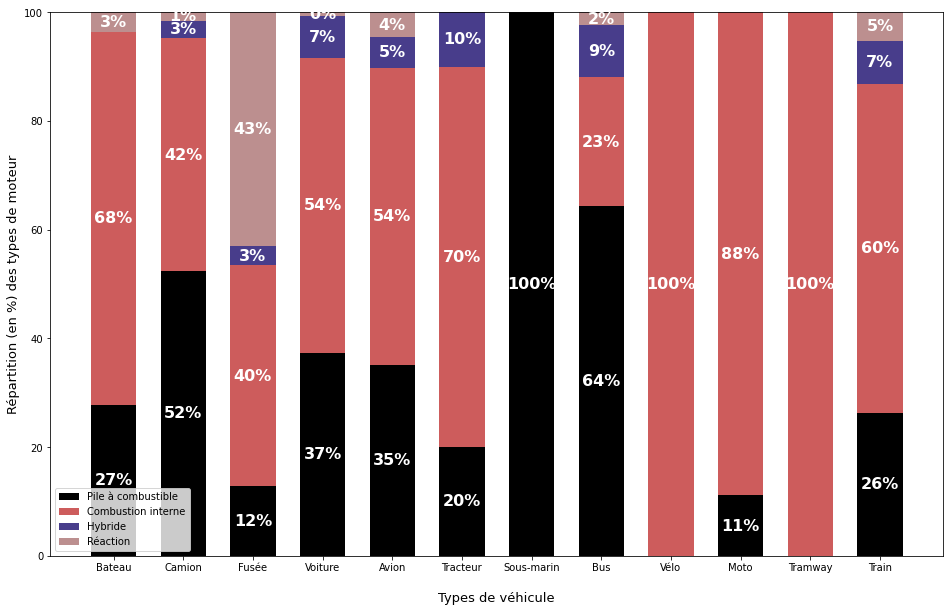

In [28]:
# Apply the function for stacked diagrams to 100% of the engine type results
colors=['black', 'indianred', 'darkslateblue', 'rosybrown']
stacked_100(vehicule, moteur, count, "Moteur", "des types de moteur")

## Part 3 - Informations about years

In [6]:
# SELECT query for years
req_sql = " SELECT to_char(date_article,'YYYY'), COUNT(id_article) \
            FROM Article \
            WHERE to_char(date_article,'YYYY') IS NOT NULL AND to_char(date_article,'YYYY') < 2021 \
            GROUP BY to_char(date_article,'YYYY') \
            ORDER BY to_char(date_article,'YYYY')"

(annee, nb_articles) = select_partie1(req_sql)

In [7]:
# To have a continuous graph, we add the value zero for the missing years.

# Dictionary that contains the years as a key and the number of articles as a value
dic = {}
for i,j in zip(annee, nb_articles):
    dic[i] = j
    
# A continuous year list is defined 
deb = int(annee[0])
fin = 2020
new_annee = range(deb, fin+1)

# Missing years are added 
new_nb_articles = []
for annee in new_annee : 
    if str(annee) in dic:
        new_nb_articles.append(dic[str(annee)])
    else : 
        new_nb_articles.append(0)

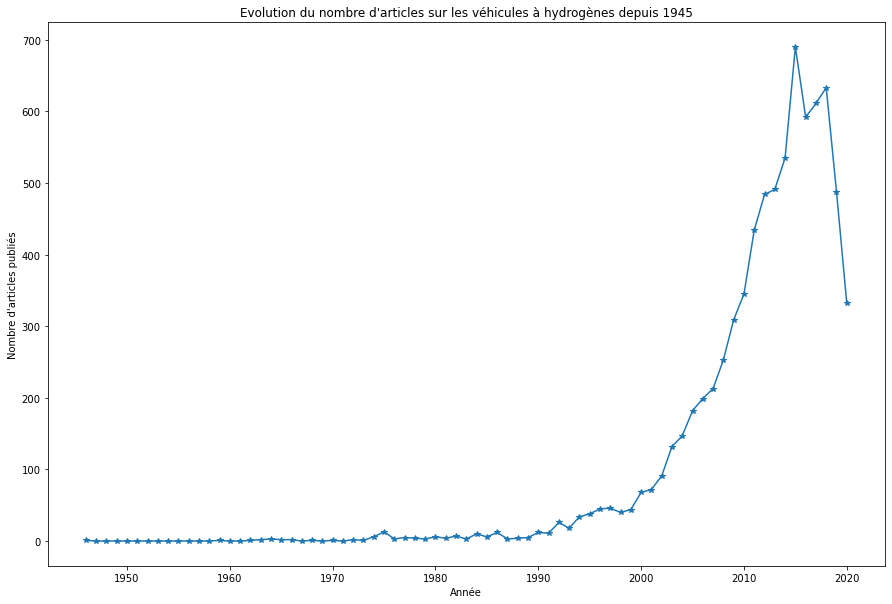

In [31]:
# Figure
plt.figure(figsize=(15,10))

# Curve 
plt.plot(new_annee, new_nb_articles, "*-")

# Titles 
plt.title("Evolution du nombre d'articles sur les véhicules à hydrogènes depuis 1945")
plt.xlabel("Année")
plt.ylabel("Nombre d'articles publiés")

# Save 
plt.savefig("Partie3_annee.jpeg")

# Display 
plt.show()

In [19]:
def timeline(title, list_colors, years, atts):
    """
    Documentation:
        - Function that allows you to create a timeline 

    Parameters: 
        - title : title of the timeline 
        - list_colors : list of colors
        - annees : list of years
        - atts : list of modalities 
    """
    
    # Connexion 
    py.init_notebook_mode(connected=True)

    # Creation of a DataFrame containing the most popular years and terms.
    df = []
    for year, att in zip(years, atts):
        dic = dict(Task=att, Start=year, Finish=str(int(year)+1), Resource=att)
        df.append(dic)
        
    # Association colour-modality
    colors = {}
    for color, resource in zip(list_colors, set(atts)):
        colors[resource] = color
        
    # If there are a lot of colours (and therefore a lot of modalities), we enlarge the timeline
    if len(colors) > 5:
        height = 700
    else : 
        height = 500
    
    # Timeline
    fig = ff.create_gantt(df, colors = colors, index_col='Resource', show_colorbar=True, group_tasks=True,
                          bar_width=0.2, showgrid_x=True, showgrid_y=True, title  =title, 
                         show_hover_fill =False, height=height)
    
    # Display
    py.iplot(fig, filename='stacked-bar')

In [20]:
# List of color 
list_colors = ['rgb(205,92,92)', 'rgb(72,61,139)', 'rgb(188,143,143)', 'rgb(0,0,0)', 'rgb(143,188,143)', 
              'rgb(211,211,211)', 'rgb(255, 182, 193)', 'rgb(255,228,225)', 'rgb(255, 160, 122)', 'rgb(255,215,0)', 
              'rgb(189,183,107)', 'rgb(230,230,250)', 'rgb(238,130,238)', 'rgb(0,255,0)', 'rgb(0,139,139)', 
              'rgb(165,42,42)', 'rgb(255,250,240)']

In [21]:
# SELECT query year-source
req_sql = " SELECT to_char(A.date_article,'YYYY'), T.source \
            FROM Article A, Technologie T, Technologie_Evoq TE \
            WHERE A.id_article = TE.id_article AND T.id_tech = TE.id_tech AND T.categorie = 'Production' AND to_char(A.date_article,'YYYY') <2021 AND to_char(A.date_article,'YYYY') >1989 \
            HAVING count(A.id_article) = ( \
                SELECT MAX(COUNT(A2.id_article)) \
                FROM Article A2, Technologie T2, Technologie_Evoq TE2 \
                WHERE A2.id_article = TE2.id_article AND T2.id_tech = TE2.id_tech AND to_char(A2.date_article,'YYYY') = to_char(A.date_article,'YYYY') AND T2.categorie = 'Production' \
                GROUP BY T2.source \
            ) \
            GROUP BY to_char(A.date_article,'YYYY'), T.source \
            ORDER BY to_char(A.date_article,'YYYY'), count(A.id_article)"

annees, sources = select_partie1(req_sql)

In [22]:
# (!) The code must be executed for the timeline to be displayed (!)
timeline("Source la plus mentionnée par année depuis 1990", list_colors, annees, sources)

In [36]:
# SELECT query year-techno
req_sql = " SELECT to_char(A.date_article,'YYYY'), T.nom_tech \
            FROM Article A, Technologie T, Technologie_Evoq TE \
            WHERE A.id_article = TE.id_article AND T.id_tech = TE.id_tech AND T.categorie = 'Stockage' AND to_char(A.date_article,'YYYY') <2021 \
            HAVING count(A.id_article) = ( \
                SELECT MAX(COUNT(A2.id_article)) \
                FROM Article A2, Technologie T2, Technologie_Evoq TE2 \
                WHERE A2.id_article = TE2.id_article AND T2.id_tech = TE2.id_tech AND to_char(A2.date_article,'YYYY') = to_char(A.date_article,'YYYY') AND T2.categorie = 'Stockage'  AND to_char(A.date_article,'YYYY') >1990 \
                GROUP BY T2.nom_tech \
            ) \
            GROUP BY to_char(A.date_article,'YYYY'), T.nom_tech \
            ORDER BY to_char(A.date_article,'YYYY'), count(A.id_article)"

annees, stockages = select_partie1(req_sql)

In [37]:
# (!) The code must be executed for the timeline to be displayed (!)
timeline("Type de stockage le plus cité par année depuis 1990", list_colors, annees, stockages)

In [38]:
# SELECT query year-vehicles
req_sql = " SELECT to_char(A.date_article,'YYYY'), V.type_vehicule \
            FROM Article A, Vehicule V, Vehicule_Evoq VE \
            WHERE A.id_article = VE.id_article AND V.id_vehicule = VE.id_vehicule AND to_char(A.date_article,'YYYY') <2021 AND to_char(A.date_article,'YYYY') >1990 \
            HAVING COUNT(A.id_article) = ( \
                SELECT MAX(COUNT(A2.id_article)) \
                FROM Article A2, Vehicule V2, Vehicule_Evoq VE2 \
                WHERE A2.id_article = VE2.id_article AND V2.id_vehicule = VE2.id_vehicule AND to_char(A2.date_article,'YYYY') = to_char(A.date_article,'YYYY') \
                GROUP BY V2.type_vehicule \
            ) \
            GROUP BY to_char(A.date_article,'YYYY'), V.type_vehicule \
            ORDER BY to_char(A.date_article,'YYYY'), count(A.id_article)"

annees, vehicules = select_partie1(req_sql)

In [39]:
# (!) The code must be executed for the timeline to be displayed (!)
timeline("Type de véhicule le plus mentionné par année depuis 1990", list_colors, annees, vehicules)

In [40]:
# SELECT query year-source
req_sql = " SELECT to_char(A.date_article,'YYYY'), P.nom_pays \
            FROM Article A, Pays P, Pays_Evoq PE \
            WHERE A.id_article = PE.id_article AND P.id_pays = PE.id_pays AND to_char(A.date_article,'YYYY') <2021  AND to_char(A.date_article,'YYYY') >1990 \
            HAVING COUNT(A.id_article) = ( \
                SELECT MAX(COUNT(A2.id_article)) \
                FROM Article A2, Pays P2, Pays_Evoq PE2 \
                WHERE A2.id_article = PE2.id_article AND P2.id_pays = PE2.id_pays AND to_char(A2.date_article,'YYYY') = to_char(A.date_article,'YYYY') \
                GROUP BY P2.nom_pays \
            ) \
            GROUP BY to_char(A.date_article,'YYYY'), P.nom_pays \
            ORDER BY to_char(A.date_article,'YYYY'), count(A.id_article)"

annees, pays = select_partie1(req_sql)

In [41]:
# (!) The code must be executed for the timeline to be displayed (!)
timeline("Pays le plus mentionné par année depuis 1990", list_colors, annees, pays)

In [42]:
# SELECT query year-brand
req_sql = " SELECT to_char(A.date_article,'YYYY'), M.nom_marque \
            FROM Article A, Marque M, Marque_Evoq ME \
            WHERE A.id_article = ME.id_article AND M.id_marque = ME.id_marque AND to_char(A.date_article,'YYYY') <2021 AND to_char(A.date_article,'YYYY') >1990 \
            HAVING COUNT(A.id_article) = ( \
                SELECT MAX(COUNT(A2.id_article)) \
                FROM Article A2, Marque M2, Marque_Evoq ME2 \
                WHERE A2.id_article = ME2.id_article AND M2.id_marque = ME2.id_marque AND to_char(A2.date_article,'YYYY') = to_char(A.date_article,'YYYY') \
                GROUP BY M2.nom_marque \
            ) \
            GROUP BY to_char(A.date_article,'YYYY'), M.nom_marque \
            ORDER BY to_char(A.date_article,'YYYY'), COUNT(A.id_article)"

annees, marques = select_partie1(req_sql)

In [43]:
# (!) The code must be executed for the timeline to be displayed (!)
timeline("Marque la plus citée par année depuis 1990", list_colors, annees, marques)

## Part 4 - Informations about countries

In [44]:
# SELECT query countries
req_sql = " SELECT P.nom_pays, COUNT(PE.id_pays) \
            FROM Pays_Evoq PE, Pays P \
            WHERE P.id_pays = PE.id_pays \
            GROUP BY P.nom_pays \
            ORDER BY COUNT(PE.id_pays) DESC"

(pays, nb_articles) = select_partie1(req_sql)
pays = [item.upper() for item in pays]

In [45]:
# The results are transformed into a DataFrame
df = pd.DataFrame(np.transpose([pays, nb_articles]), columns=['Pays', 'Nb'])
df['Nb'] = df['Nb'].apply(lambda x: int(x))

In [51]:
def carte(df, isUSA, titre):
    """
    Documentation:
        - Function to create a world map with a shade of colour 

    Parameters: 
        - df : DataFrame which contains the results 
        - isUSA : boolean for the map with USA or not
        - titre : title of the map 
    """

    # Figures and axes
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([-150, 60, -25, 60])

    # Adding functionality
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Title of map depeding of the presence of USA or not
    if (isUSA):
        ax.set_title(
            "Nombre de fois qu'un pays est évoqué dans un article scientifique \nsur les véhicules hydrogènes")
    else:
        ax.set_title(
            "Nombre de fois qu'un pays est évoqué dans un article scientifique \nsur les véhicules hydrogènes (Etats-Unis exclus)")

    # Map of world
    shpfilename = shpreader.natural_earth(resolution='110m',
                                          category='cultural',
                                          name='admin_0_countries')
    reader = shpreader.Reader(shpfilename)
    countries = reader.records()

    # Values representing the number of times countries are mentioned
    values = [nb for nb in df.Nb]
    norm = mat_colors.Normalize(vmin=min(values), vmax=max(values))
    cmap = plt.cm.get_cmap('Reds')

    labels = []
    lab_col = []

    # We go through the countries and colour them if necessary
    for country in countries:
        c = country.attributes['NAME_FR'].upper()
        if c in pays or (c == 'ÉTATS-UNIS' and isUSA) or ("CHINE" in c):
            labels.append(c)

            # The value associated with the current country is retrieved
            try:
                nb = df.loc[df['Pays'] == c, 'Nb'].values[0]
            except:
                if ("CHINE" not in c):
                    nb = df.loc[df['Pays'] == 'ETATS-UNIS', 'Nb'].values[0]
                else:
                    nb = df.loc[df['Pays'] == 'CHINE', 'Nb'].values[0]

            # We colour
            if country.geometry.geom_type == 'MultiPolygon':

                ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                                  facecolor=cmap(norm(nb)),
                                  edgecolor='k',
                                  label=c)

            elif country.geometry.geom_type == 'Polygon':
                ax.add_geometries([country.geometry], ccrs.PlateCarree(),
                                  facecolor=cmap(norm(nb)),
                                  edgecolor='k',
                                  label=c)

    # Legende
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap),
                 shrink=0.25, aspect=10)

    # Save
    plt.savefig("partie4_pays_" + titre + ".jpeg")

    # Display
    plt.show()

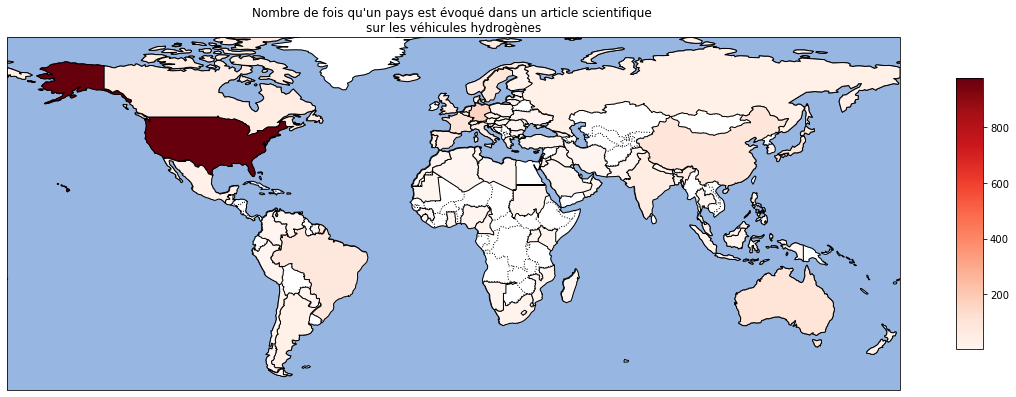

In [52]:
# With USA 
carte(df, True, "avecUSA")

In [53]:
# USA is removed from the DataFrame
df.drop(df.loc[df['Pays']=='ETATS-UNIS'].index, inplace=True)

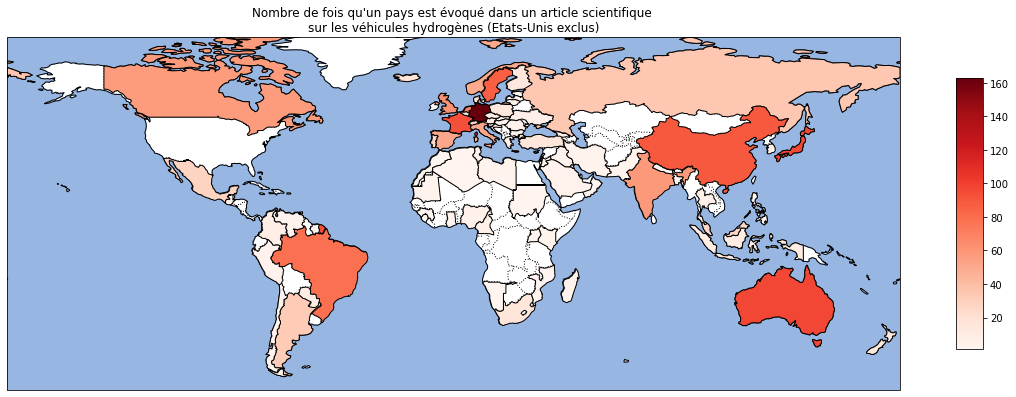

In [54]:
# Without USA 
carte(df, False, "sansUSA")

In [55]:
(pays_tempo, nb_articles_tempo) = select_partie1(req_sql)

In [56]:
pays = []
nb_articles = []
somme_autre = 0
cpt = 0

for p, nb in zip(pays_tempo, nb_articles_tempo):
    if (cpt <= 16):
        pays.append(p)
        nb_articles.append(nb)
    else:
        somme_autre += nb
    cpt += 1

pays.append('Autre')
nb_articles.append(somme_autre)

In [57]:
dico_pays = {
    "Etats-Unis": "USA",
    "Pays-Bas": "Pays-\nBas",
    "Royaume-Uni": "Royaume-\nUni",
    "Allemagne": "All."
}

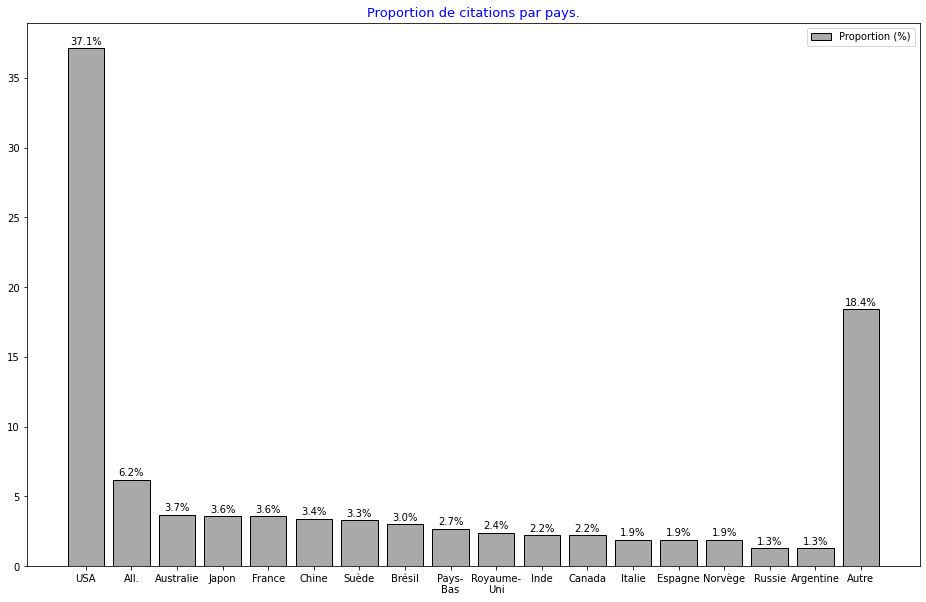

In [58]:
histo_diag_circu([nb_articles], ['par pays.'], [
                 dico_pays], [pays], ['Pays'], False)

In [59]:
def autolabel2(rects, labels, axes, ajustementY, isPourcentage):
    """ 
    Documentation:
        - Display value labels above each bar in histograms

    Parameters: 
        * rects (BarContainer): object containing the rectangles whose values you want to display 
        above
        * axes (matplotlib.axes): object allowing to know the subgraph of the figure where the bar chart will be displayed. 
        the bar chart will be displayed.
        * adjustmentY (int): depending on the graph, the position of the label above each bar
        (int): depending on the graph, the position of the label above each bar will not be exactly the same, so an adjustment of this position will be made by giving 
        parameters an integer.  
        * isPercentage (boolean): Allows you to know if you should display the values in percent or not 

    Outputs : 
        * rects (BarContainer): object containing the modified rectangles
        * axes (matplotlib.axes): object allowing to know the subgraph of the figure where the bar chart will be 
        display the bar chart.
    """

    # For each bar in the bar chart
    for rect, label in zip(rects, labels):

        # The height is retrieved
        height = rect.get_height()

        if (isPourcentage):

            # Display the label, round the value to one decimal point and then make
            # some adjustments to the position and text.
            axes.annotate(str(label), xy=(rect.get_x() + rect.get_width() / 2, height),
                          xytext=(0, ajustementY), textcoords="offset points", ha='center',
                          va='bottom', fontsize=15)
    return rects, axes

In [60]:
req_sql = " SELECT P2.nom_pays, V2.type_vehicule \
            FROM Article A2, Vehicule V2, Vehicule_Evoq VE2, Pays P2, Pays_Evoq PE2 \
            WHERE A2.id_article = VE2.id_article AND V2.id_vehicule = VE2.id_vehicule AND A2.id_article = PE2.id_article AND P2.id_pays = PE2.id_pays  \
            AND P2.nom_pays IN ( \
                SELECT * FROM ( \
                    SELECT P.nom_pays \
                    FROM Pays_Evoq PE, Pays P \
                    WHERE P.id_pays = PE.id_pays \
                    GROUP BY P.nom_pays \
                    ORDER BY COUNT(PE.id_pays) DESC \
                ) \
                WHERE ROWNUM <= 10) \
            AND V2.type_vehicule IN ( \
                SELECT * FROM ( \
                    SELECT V.type_vehicule \
                    FROM Vehicule V, Vehicule_Evoq VE, Article A, Pays_Evoq PE \
                    WHERE V.id_vehicule = VE.id_vehicule AND A.id_article = PE.id_article AND A.id_article = VE.id_article AND PE.id_pays = PE2.id_pays \
                    GROUP BY V.type_vehicule \
                    ORDER BY COUNT(VE.id_vehicule) DESC \
                ) \
                WHERE ROWNUM <= 3) \
            GROUP BY P2.nom_pays, V2.type_vehicule \
            ORDER BY P2.nom_pays, COUNT(A2.id_article) DESC"

(pays, vehicules) = select_partie1(req_sql)

In [61]:
def podium(pays, vehicules, sauv, titre, xlabel, ylabel):
    """ 
    Documentation:
        - Function to display the podiums 
    """

    # Figures
    fig, ax = plt.subplots(figsize=(20, 10))

    y1 = [2] * len(set(pays))
    y2 = [3] * len(set(pays))
    y3 = [1] * len(set(pays))

    barWidth = 0.3

    # Position of the bars
    r1 = range(len(y1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    # Histograms
    rects1 = ax.bar(r1, y1, width=barWidth, color=[
                    'silver' for i in y1], linewidth=2)
    rects2 = ax.bar(r2, y2, width=barWidth, color=[
                    'gold' for i in y1], linewidth=4)
    rects3 = ax.bar(r3, y3, width=barWidth, color=[
                    'tan' for i in y1], linewidth=4)

    # Labels
    labels1 = [item for item in vehicules[::3]]
    labels2 = [item for item in vehicules[1::3]]
    labels3 = [item for item in vehicules[2::3]]

    labelsx = [item for item in pays[::3]]

    # Labels positions
    plt.xticks([r + 2*barWidth / 3 for r in range(len(y1))],
               labelsx, fontsize=14)

    # Display of values below the bars
    (rect, ax) = autolabel2(rects1, labels2, ax, 2, True)
    (rect, ax) = autolabel2(rects2, labels1, ax, 2, True)
    (rect, ax) = autolabel2(rects3, labels3, ax, 2, True)

    # Titles figures and axes
    plt.title(titre, fontsize=15)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)

    # Save
    plt.savefig("partie4_" + sauv + ".jpeg")

    # Display
    plt.show()

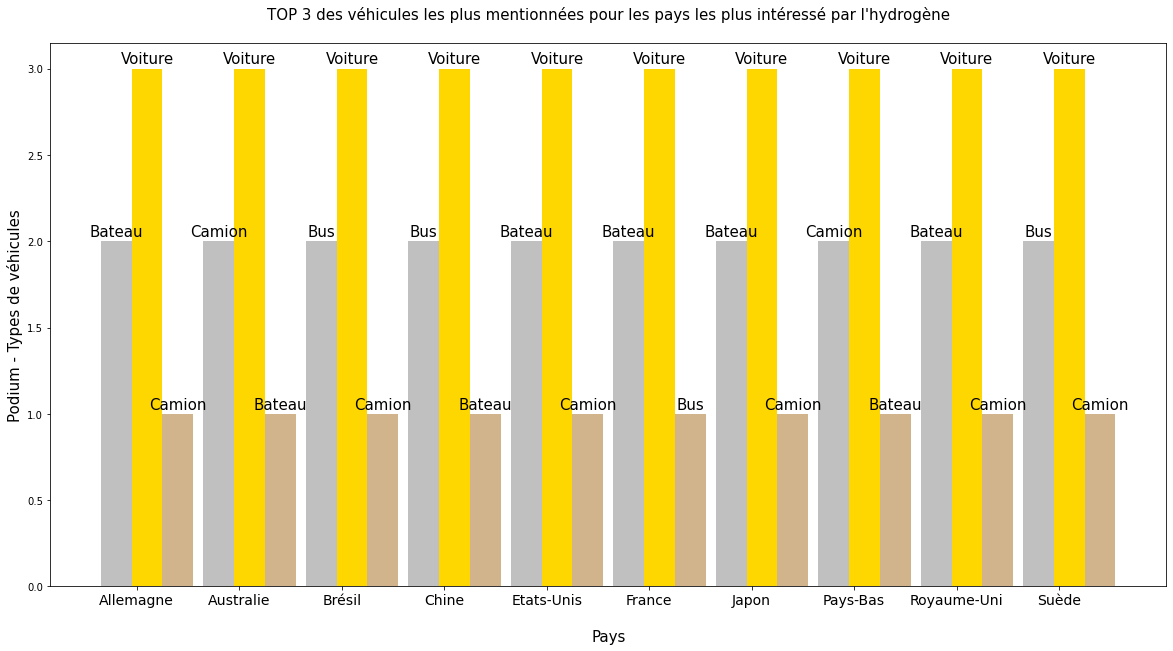

In [62]:
podium(pays, vehicules, "vehi_pays", "TOP 3 des véhicules les plus mentionnées pour les pays les plus intéressé par l'hydrogène\n",
       "\nPays", "Podium - Types de véhicules")

In [63]:
req_sql = " SELECT V2.type_vehicule, P2.nom_pays, COUNT(A2.id_article) \
            FROM Article A2, Vehicule V2, Vehicule_Evoq VE2, Pays P2, Pays_Evoq PE2 \
            WHERE A2.id_article = VE2.id_article AND V2.id_vehicule = VE2.id_vehicule AND A2.id_article = PE2.id_article AND P2.id_pays = PE2.id_pays \
            AND P2.nom_pays IN ( \
                SELECT * FROM ( \
                    SELECT P.nom_pays \
                    FROM Pays_Evoq PE, Pays P, Vehicule_Evoq VE, Article A \
                    WHERE P.id_pays = PE.id_pays AND A.id_article = PE.id_article AND A.id_article = VE.id_article AND VE.id_vehicule = VE2.id_vehicule \
                    GROUP BY P.nom_pays \
                    ORDER BY COUNT(PE.id_pays) DESC \
                ) \
                WHERE ROWNUM <= 3) \
            HAVING COUNT(A2.id_article) >2  \
            GROUP BY P2.nom_pays, V2.type_vehicule \
            ORDER BY V2.type_vehicule, COUNT(A2.id_article) DESC"

(vehicules, pays) = select_partie1(req_sql)

In [64]:
# Sometimes podiums are not complete, you have to fill them with '/'.
cpt = 0
prec = None
new_vehicules = []
new_pays = []

for v, p in zip(vehicules, pays):
    if (v != prec and cpt != 0):
        if (cpt == 1):
            new_vehicules.append(prec)
            new_vehicules.append(prec)
            new_pays.append('/')
            new_pays.append('/')
        elif (cpt == 2):
            new_vehicules.append(prec)
            new_pays.append('/')
        new_vehicules.append(v)
        new_pays.append(p)
        cpt = 0
    else:
        new_vehicules.append(v)
        new_pays.append(p)
    prec = v
    cpt += 1

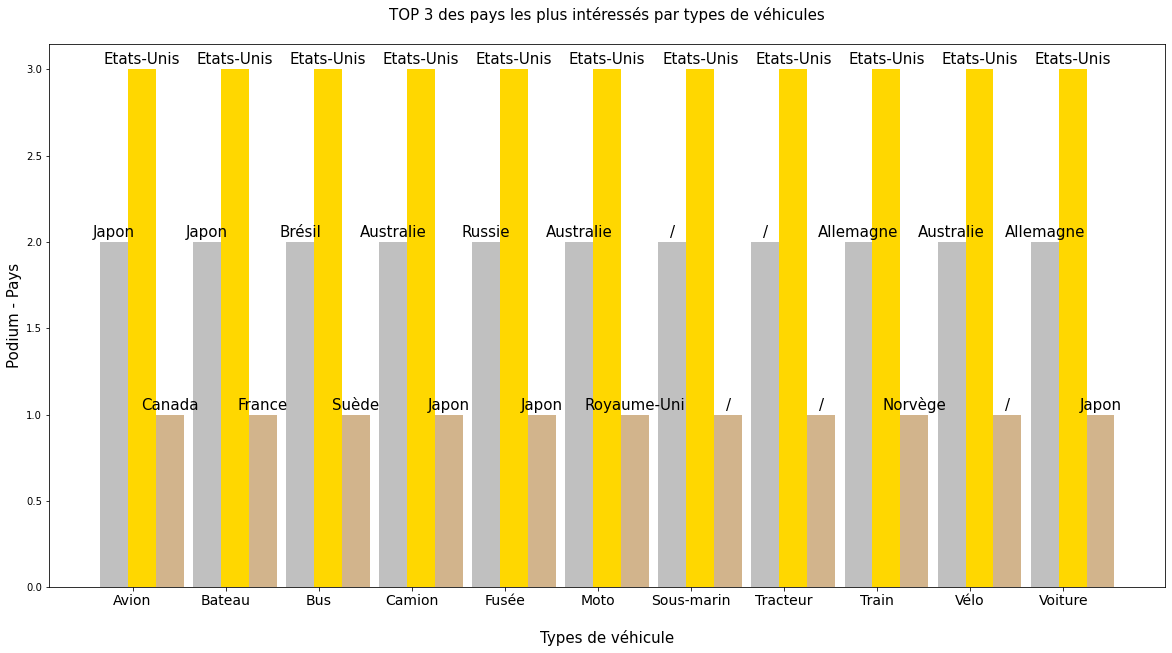

In [65]:
podium(new_vehicules, new_pays, "pays_vehi", "TOP 3 des pays les plus intéressés par types de véhicules\n", 
      "\nTypes de véhicule", "Podium - Pays")